In [1]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from scipy import stats
import numpy as np
import itertools
import pandas as pd

In [4]:
import datetime as dt
from datetime import date

In [5]:
engine = create_engine('sqlite:///Northwind_small.sqlite', echo=True)
Session = sessionmaker(bind=engine)
session = Session()

In [6]:
inspector = inspect(engine)

2019-04-06 19:27:20,818 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-06 19:27:20,819 INFO sqlalchemy.engine.base.Engine ()
2019-04-06 19:27:20,821 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-06 19:27:20,821 INFO sqlalchemy.engine.base.Engine ()


In [7]:
con = engine.connect()

In [8]:
def make_df(table, cols):
    
    '''Create a dataframe from an ORM table, with the option to select specific columns from that table. To return
    all columns from a table, set cols equal to None.
    
    table: String that exactly matches the table name
    cols: String of column names'''
    
    # Return all columns from table if cols parameter equals None
    if cols == None:
        
        # Creates the dataframe
        return pd.read_sql_query(f'SELECT * FROM {table}', engine)
    
    # Return specified columns from table
    else:
        
        # Creates the dataframe
        return pd.read_sql_query(f'SELECT {cols} FROM {table}', engine)

In [9]:
def join_2 (table1, table2, cols, on):
    
    '''Create a dataframe from the joining of two ORM tables. User may specify specific columns to include.
    
    table1: String exactly matching the table name followed by its allias (if necessary)
    table2: String exactly matching the table name followed by its allias (if necessary)
    cols: String of column names (with appropriate allias) to include in dataframe
    on: String indicating what columns (with appropriate allias) to join table1 and table2'''
    
    # Return all columns from table if cols parameter equals None
    if cols == None:
        
        # Creates the dataframe
        return pd.read_sql_query(f"SELECT * FROM {table1} JOIN {table2} on {on}", engine)
    
    # Return specified columns from table
    else:
        
        # Creates the dataframe
        return pd.read_sql_query(f"SELECT {cols} FROM {table1} JOIN {table2} on {on}", engine)
    
    
def join_3 (table1, table2, table3, cols, on1, on2):
    
    '''Create a dataframe from the joining of three ORM tables. User may specify specific columns to include.
    
    table1: String exactly matching the table name followed by its allias (if necessary)
    table2: String exactly matching the table name followed by its allias (if necessary)
    table3: String exactly matching the table name followed by its allias (if necessary)
    cols: String of column names (with appropriate allias) to include in dataframe
    on1: String indicating what columns (with appropriate allias) to join table1 and table2
    on2: String indicating what columns (with appropriate allias) to join table2 and table3'''
    
    # Return all columns from table if cols parameter equals None
    if cols == None:
        
        # Creates the dataframe
        return pd.read_sql_query(f"SELECT * FROM {table1} JOIN {table2} on {on1} JOIN {table3} on {on2}", engine)
    
    # Return specified columns from table
    else:
        
        # Creates the dataframe
        return pd.read_sql_query(f"SELECT {cols} FROM {table1} JOIN {table2} on {on1} JOIN {table3} on {on2}", engine)
    
    
def join_4 (table1, table2, table3, table4, cols, on1, on2, on3):
        
    '''Create a dataframe from the joining of four ORM tables. User may specify specific columns to include.
    
    table1: String exactly matching the table name followed by its allias (if necessary)
    table2: String exactly matching the table name followed by its allias (if necessary)
    table3: String exactly matching the table name followed by its allias (if necessary)
    table4: String exactly matching the table name followed by its allias (if necessary)
    cols: String of column names (with appropriate allias) to include in dataframe
    on1: String indicating what columns (with appropriate allias) to join table1 and table2
    on2: String indicating what columns (with appropriate allias) to join table2 and table3
    on3: String indicating what columns (with appropriate allias) to join table3 and table4'''
    
    # Return all columns from table if cols parameter equals None
    if cols == None:
        
        # Creates the dataframe
        return pd.read_sql_query(f"SELECT * FROM {table1} JOIN {table2} on {on1} JOIN {table3} on {on2} JOIN {table4} on {on3}", engine)
    
    # Return specified columns from table
    else:
        
        # Creates the dataframe
        return pd.read_sql_query(f"SELECT {cols} FROM {table1} JOIN {table2} on {on1} JOIN {table3} on {on2} JOIN {table4} on {on3}", engine)

In [10]:
order_detail = make_df('OrderDetail', cols=None)
order_detail['Unit_Total'] = order_detail.UnitPrice * order_detail.Quantity * (1 - order_detail.Discount)

#order_detail.head()




2019-04-06 19:27:28,431 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-04-06 19:27:28,432 INFO sqlalchemy.engine.base.Engine ()


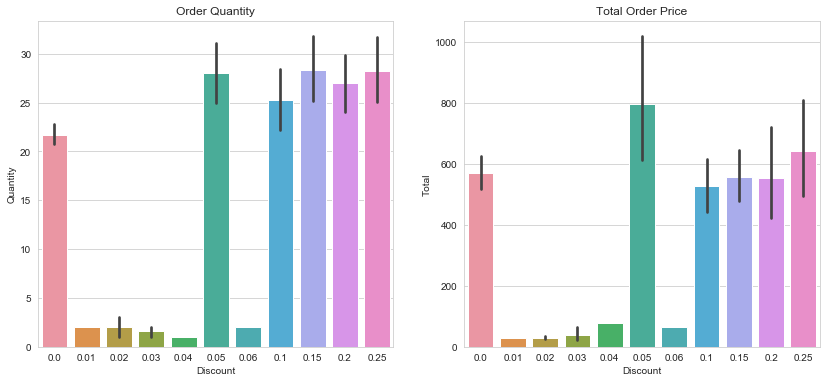

In [59]:
fig, axes = plt.subplots(1,2, figsize=[14,6])

order_detail['Total'] = order_detail.UnitPrice * order_detail.Quantity * (1-order_detail.Discount)
sns.barplot(x='Discount', y='Total', data=order_detail, ax=axes[1])
axes[1].set_title('Total Order Price')
sns.barplot(x='Discount', y='Quantity', data=order_detail, ax=axes[0])
axes[0].set_title('Order Quantity')
plt.savefig('Quantity_Total_Barchart_Discounts')
plt.show()

In [12]:
orders = make_df('[Order]', cols=None)

orders_region_grouped = orders.copy()

orders_region_grouped.loc[(orders_region_grouped.ShipRegion == 'Northern Europe') | 
                          (orders_region_grouped.ShipRegion == 'Scandinavia'),
                          'ShipRegion'] = 'Northern Europe/Scandinavia'
orders_region_grouped.loc[(orders_region_grouped.ShipRegion == 'Eastern Europe') | 
                          (orders_region_grouped.ShipRegion == 'Southern Europe'), 
                          'ShipRegion'] = 'Eastern/Southern Europe'
orders_region_grouped.loc[(orders_region_grouped.ShipRegion == 'Central America') | 
                          (orders_region_grouped.ShipRegion == 'South America'), 
                          'ShipRegion'] = 'Central/South America'

orders_region_grouped.head()

2019-04-06 19:28:53,653 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Order]
2019-04-06 19:28:53,654 INFO sqlalchemy.engine.base.Engine ()


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,Central/South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


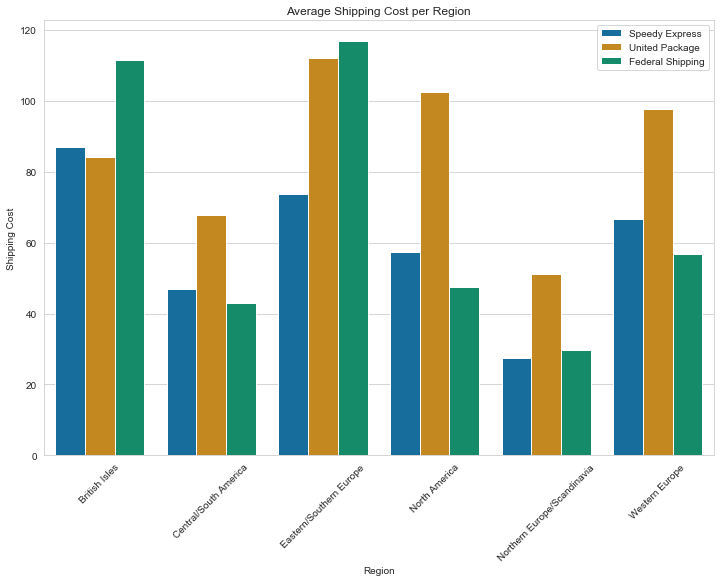

In [60]:
fig = plt.figure(figsize=[12,8])
sns.barplot(x='ShipRegion', y='Freight', data=orders_region_grouped, hue='ShipVia', ci=0, palette='colorblind')
plt.xticks(np.arange(6), ('British Isles', 'Central/South America', 'Eastern/Southern Europe', 'North America', 
                          'Northern Europe/Scandinavia', 'Western Europe'), 
           rotation=45)
plt.ylabel('Shipping Cost')
plt.xlabel('Region')
plt.title('Average Shipping Cost per Region')
L=plt.legend()
L.get_texts()[0].set_text('Speedy Express')
L.get_texts()[1].set_text('United Package')
L.get_texts()[2].set_text('Federal Shipping')
plt.savefig('Shipping_Cost_Region_Bar')
plt.show()

In [14]:
orders_region_grouped.ShippedDate.isna().sum()
ord_reg_grp = orders_region_grouped.copy()
ord_reg_grp.dropna(inplace=True)
ord_reg_grp.isna().sum()

Id                0
CustomerId        0
EmployeeId        0
OrderDate         0
RequiredDate      0
ShippedDate       0
ShipVia           0
Freight           0
ShipName          0
ShipAddress       0
ShipCity          0
ShipRegion        0
ShipPostalCode    0
ShipCountry       0
dtype: int64

In [15]:
ord_reg_grp.OrderDate = pd.to_datetime(ord_reg_grp.OrderDate)
ord_reg_grp.ShippedDate = pd.to_datetime(ord_reg_grp.ShippedDate)

time_to_Ship = ord_reg_grp.ShippedDate - ord_reg_grp.OrderDate
ord_reg_grp['Order_Processing'] = (time_to_Ship / np.timedelta64(1, 'D')).astype(int)

ord_reg_grp.RequiredDate = pd.to_datetime(ord_reg_grp.RequiredDate)
required_time = ord_reg_grp.ShippedDate - ord_reg_grp.RequiredDate
ord_reg_grp['Promised_Time'] = (required_time / np.timedelta64(1, 'D')).astype(int)
ord_reg_grp.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Order_Processing,Promised_Time
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,12,-16
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,5,-37
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,Central/South America,05454-876,Brazil,4,-24
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,7,-21
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium,2,-26


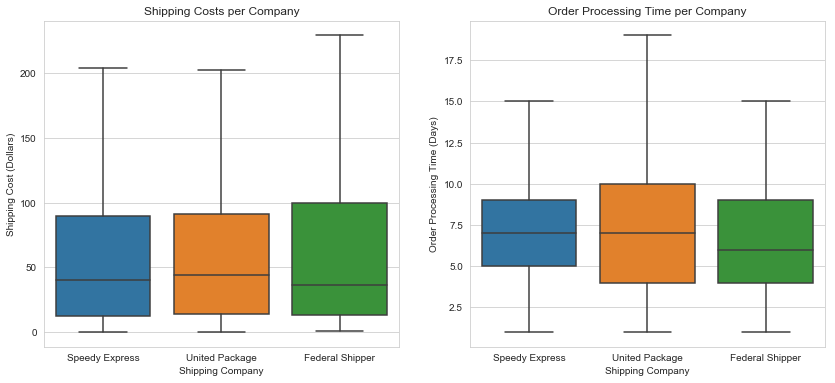

In [61]:
fig, axes = plt.subplots(1,2, figsize=[14,6])

sns.boxplot(x='ShipVia', y='Freight', data=orders, showfliers=False, ax=axes[0])
axes[0].set_title('Shipping Costs per Company')
axes[0].set_xlabel('Shipping Company')
axes[0].set_ylabel('Shipping Cost (Dollars)')
axes[0].set_xticklabels(('Speedy Express', 'United Package', 'Federal Shipper'))

sns.boxplot(x='ShipVia', y='Order_Processing', data=ord_reg_grp, showfliers=False, ax=axes[1])
axes[1].set_title('Order Processing Time per Company')
axes[1].set_xlabel('Shipping Company')
axes[1].set_ylabel('Order Processing Time (Days)')
axes[1].set_xticklabels(('Speedy Express', 'United Package', 'Federal Shipper'))
plt.savefig('Ship_Cost_Speed_Box')
plt.show()

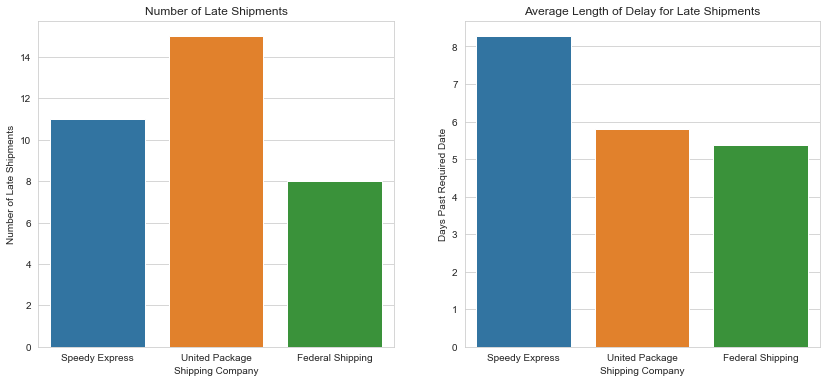

In [65]:
failures = ord_reg_grp.loc[ord_reg_grp.Promised_Time > 0]

fig, axes = plt.subplots(1,2, figsize=[14,6])

sns.barplot(x='ShipVia', y='Promised_Time', data=failures, ci=0, ax=axes[1])
axes[1].set_title('Average Length of Delay for Late Shipments')
axes[1].set_xticks(np.arange(3))
axes[1].set_xticklabels(('Speedy Express', 'United Package', 'Federal Shipping'))
axes[1].set_ylabel('Days Past Required Date')
axes[1].set_xlabel('Shipping Company')

sns.countplot(x= 'ShipVia', data=failures, ax=axes[0])
axes[0].set_title('Number of Late Shipments')
axes[0].set_xticks(np.arange(3))
axes[0].set_xticklabels(('Speedy Express', 'United Package', 'Federal Shipping'))
axes[0].set_ylabel('Number of Late Shipments')
axes[0].set_xlabel('Shipping Company')
plt.savefig('Late_Shipments_Bar')
plt.show()

In [25]:
contacts_main = join_3('Customer c', '[Order] o', 'OrderDetail d', '''c.CompanyName, c.ContactTitle, d.OrderId, 
d.UnitPrice, d.Quantity, d.Discount''', 'c.Id = o.CustomerId', 'd.OrderId = o.Id')

results = []
for order in contacts_main.OrderId.unique():
    temp = contacts_main.loc[contacts_main.OrderId == order]
    quant = sum(temp.Quantity)
    cost = sum(temp.UnitPrice * temp.Quantity * (1-temp.Discount))
    results.append([order, temp.CompanyName.max(), temp.ContactTitle.max(), quant, cost])

contacts = pd.DataFrame(results, columns=['Order', 'Company', 'Contact', 'Quantity', 'Total'])
contacts.head()

2019-04-06 19:52:13,116 INFO sqlalchemy.engine.base.Engine SELECT c.CompanyName, c.ContactTitle, d.OrderId, 
d.UnitPrice, d.Quantity, d.Discount FROM Customer c JOIN [Order] o on c.Id = o.CustomerId JOIN OrderDetail d on d.OrderId = o.Id
2019-04-06 19:52:13,117 INFO sqlalchemy.engine.base.Engine ()


,Order,Company,Contact,Quantity,Total
0,10248,Vins et alcools Chevalier,Accounting Manager,27,440.00
1,10249,Toms Spezialitäten,Marketing Manager,49,1863.40
2,10250,Hanari Carnes,Accounting Manager,60,1552.60
3,10251,Victuailles en stock,Sales Agent,41,654.06
4,10252,Suprêmes délices,Accounting Manager,105,3597.90


In [26]:
grouped_contacts = contacts.copy()

grouped_contacts.loc[(grouped_contacts.Contact == 'Owner') | 
                     (grouped_contacts.Contact == 'Owner/Marketing Assistant'), 'Contact'] = 'Owner'
grouped_contacts.loc[(grouped_contacts.Contact == 'Accounting Manager') | 
                     (grouped_contacts.Contact == 'Marketing Manager') | 
                     (grouped_contacts.Contact == 'Sales Manager'), 'Contact'] = 'Management'
grouped_contacts.loc[(grouped_contacts.Contact == 'Sales Agent') | 
                     (grouped_contacts.Contact == 'Sales Representative') | 
                     (grouped_contacts.Contact == 'Sales Associate'), 'Contact'] = 'Rep/Agent/Associate'
grouped_contacts.loc[(grouped_contacts.Contact == 'Assistant Sales Representative') | 
                     (grouped_contacts.Contact == 'Marketing Assistant') | 
                     (grouped_contacts.Contact == 'Assistant Sales Agent') | 
                     (grouped_contacts.Contact == 'Order Administrator'), 'Contact'] = 'Assistant/Admin'

grouped_contacts.Contact.value_counts()

Management             326
Rep/Agent/Associate    256
Owner                  130
Assistant/Admin         89
Name: Contact, dtype: int64

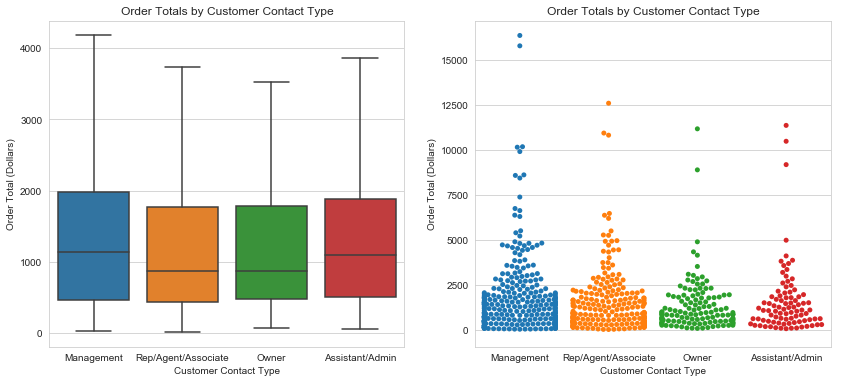

In [66]:
owner = grouped_contacts.loc[grouped_contacts.Contact == 'Owner']
manage = grouped_contacts.loc[grouped_contacts.Contact == 'Management']
reps = grouped_contacts.loc[grouped_contacts.Contact == 'Rep/Agent/Associate']
assist = grouped_contacts.loc[grouped_contacts.Contact == 'Assistant/Admin']

fig, axes = plt.subplots(1,2, figsize=[14,6])

sns.boxplot(x='Contact', y='Total', data=grouped_contacts, showfliers=False, ax=axes[0])
axes[0].set_title('Order Totals by Customer Contact Type')
axes[0].set_xlabel('Customer Contact Type')
axes[0].set_ylabel('Order Total (Dollars)')

sns.swarmplot(x='Contact', y='Total', data=grouped_contacts, ax=axes[1])
axes[1].set_title('Order Totals by Customer Contact Type')
axes[1].set_xlabel('Customer Contact Type')
axes[1].set_ylabel('Order Total (Dollars)')
plt.savefig('Customer_Contact_box_swarm')
plt.show()

In [40]:
employee_main = join_3('Employee e', '[Order] o', 'OrderDetail d', '''e.LastName, e.Id, e.BirthDate, e.HireDate, 
e.Title, d.OrderId, d.UnitPrice, d.Quantity, d.Discount, o.OrderDate, o.Freight, o.CustomerId''', 'e.Id=o.EmployeeId',
                       'd.OrderId=o.Id')

emps = []
for order in employee_main.OrderId.unique():
    temp = employee_main.loc[employee_main.OrderId == order]
    quant = sum(temp.Quantity)
    tot = sum(temp.UnitPrice * temp.Quantity * (1-temp.Discount))
    emps.append([order, temp.OrderDate.max(), temp.LastName.max(), temp.Id.max(), temp.BirthDate.max(), temp.HireDate.max(), temp.Title.max(),
                quant, tot, temp.Discount.median(), temp.Freight.max(), temp.CustomerId.max()])
    
employees = pd.DataFrame(emps, columns=['Order', 'OrderDate','EmpName', 'EmpId', 'BirthDay', 'Hired', 'Title', 
                                        'Quantity', 'Total', 'Discount', 'Freight', 'CustomerId'])
employees.head()

2019-04-06 20:21:08,188 INFO sqlalchemy.engine.base.Engine SELECT e.LastName, e.Id, e.BirthDate, e.HireDate, 
e.Title, d.OrderId, d.UnitPrice, d.Quantity, d.Discount, o.OrderDate, o.Freight, o.CustomerId FROM Employee e JOIN [Order] o on e.Id=o.EmployeeId JOIN OrderDetail d on d.OrderId=o.Id
2019-04-06 20:21:08,189 INFO sqlalchemy.engine.base.Engine ()


,Order,OrderDate,EmpName,EmpId,BirthDay,Hired,Title,Quantity,Total,Discount,Freight,CustomerId
0,10248,2012-07-04,Buchanan,5,1987-03-04,2025-10-17,Sales Manager,27,440.00,0.00,32.38,VINET
1,10249,2012-07-05,Suyama,6,1995-07-02,2025-10-17,Sales Representative,49,1863.40,0.00,11.61,TOMSP
2,10250,2012-07-08,Peacock,4,1969-09-19,2025-05-03,Sales Representative,60,1552.60,0.15,65.83,HANAR
3,10251,2012-07-08,Leverling,3,1995-08-30,2024-04-01,Sales Representative,41,654.06,0.05,41.34,VICTE
4,10252,2012-07-09,Peacock,4,1969-09-19,2025-05-03,Sales Representative,105,3597.90,0.05,51.30,SUPRD


In [41]:
discounts = []

for value in employees.Discount:
    if value == 0:
        dis = 'No'
    else:
        dis = 'Yes'
    discounts.append(dis)

employees['Discount_Given'] = discounts
employees.head()



,Order,OrderDate,EmpName,EmpId,BirthDay,Hired,Title,Quantity,Total,Discount,Freight,CustomerId,Discount_Given
0,10248,2012-07-04,Buchanan,5,1987-03-04,2025-10-17,Sales Manager,27,440.00,0.00,32.38,VINET,No
1,10249,2012-07-05,Suyama,6,1995-07-02,2025-10-17,Sales Representative,49,1863.40,0.00,11.61,TOMSP,No
2,10250,2012-07-08,Peacock,4,1969-09-19,2025-05-03,Sales Representative,60,1552.60,0.15,65.83,HANAR,Yes
3,10251,2012-07-08,Leverling,3,1995-08-30,2024-04-01,Sales Representative,41,654.06,0.05,41.34,VICTE,Yes
4,10252,2012-07-09,Peacock,4,1969-09-19,2025-05-03,Sales Representative,105,3597.90,0.05,51.30,SUPRD,Yes


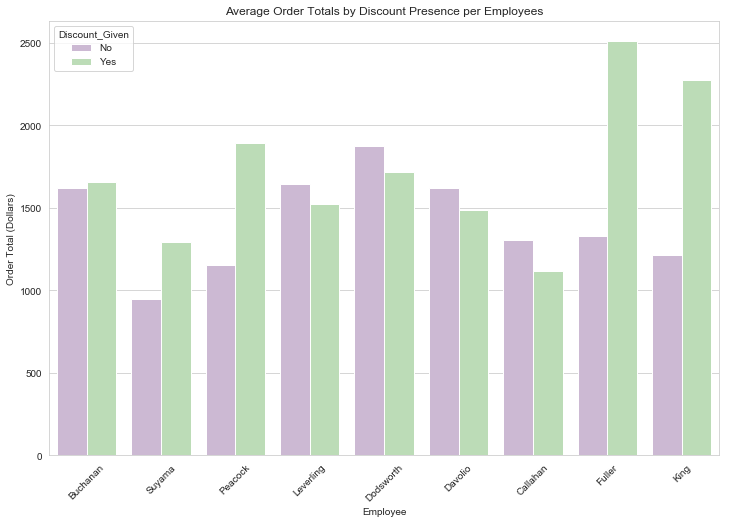

In [67]:
no_discount = employees.loc[employees.Discount == 0]
yes_discount = employees.loc[employees.Discount > 0]

fig = plt.figure(figsize=[12,8])

sns.barplot(x='EmpName', y='Total', data=employees, hue='Discount_Given', palette='PRGn', ci=0)
plt.title('Average Order Totals by Discount Presence per Employees')
plt.xlabel('Employee')
plt.xticks(rotation=45)
plt.ylabel('Order Total (Dollars)')
plt.savefig('Discount_per_Employee')
plt.show()

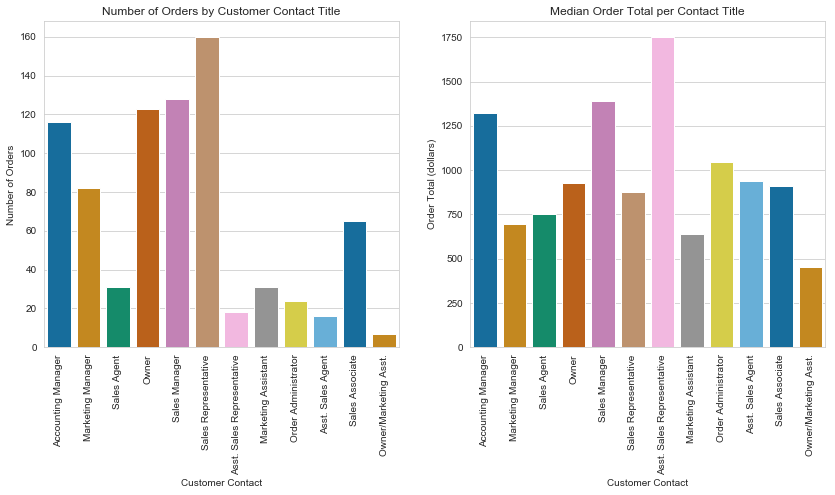

In [72]:
from numpy import median
fig, axes = plt.subplots(1,2, figsize=[14,6])

sns.countplot(contacts.Contact, palette='colorblind', ax=axes[0])
axes[0].set_xticks(np.arange(12))
axes[0].set_xticklabels(('Accounting Manager', 'Marketing Manager', 'Sales Agent', 'Owner', 
                         'Sales Manager', 'Sales Representative', 'Asst. Sales Representative',
                         'Marketing Assistant', 'Order Administrator', 'Asst. Sales Agent', 'Sales Associate',
                         'Owner/Marketing Asst.'), 
          rotation=90)
axes[0].set_title('Number of Orders by Customer Contact Title')
axes[0].set_ylabel('Number of Orders')
axes[0].set_xlabel('Customer Contact')

sns.barplot(x='Contact', y='Total', data=contacts, estimator=median, ci=0, palette='colorblind', ax=axes[1])
axes[1].set_xticks(np.arange(12))
axes[1].set_xticklabels(('Accounting Manager', 'Marketing Manager', 'Sales Agent', 'Owner', 
                         'Sales Manager', 'Sales Representative', 'Asst. Sales Representative',
                         'Marketing Assistant', 'Order Administrator', 'Asst. Sales Agent', 'Sales Associate',
                         'Owner/Marketing Asst.'), 
          rotation=90)
axes[1].set_title('Median Order Total per Contact Title')
axes[1].set_xlabel('Customer Contact')
axes[1].set_ylabel('Order Total (dollars)')
plt.savefig('Contact_Title_Bar')
plt.show()